# EDA

In [451]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# pandas show all columns
pd.set_option('display.max_columns', None)

In [452]:
df = pd.read_csv('../raw/ratings_matrix.csv')
df.head()

,User_ID,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,User_1,9.0,10.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,User_2,8.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,User_3,8.0,10.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,User_4,10.0,8.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,User_5,8.0,9.0,8.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  20 non-null     object 
 1   Item_1   20 non-null     float64
 2   Item_2   20 non-null     float64
 3   Item_3   20 non-null     float64
 4   Item_4   20 non-null     float64
 5   Item_5   20 non-null     float64
 6   Item_6   20 non-null     float64
 7   Item_7   20 non-null     float64
 8   Item_8   20 non-null     float64
 9   Item_9   20 non-null     float64
 10  Item_10  20 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


In [454]:
df.describe()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.350000,2.550000,2.450000,4.700000,4.500000,4.550000,2.300000,2.700000,2.350000,0.550000
std,3.745524,3.872644,3.804084,4.378176,4.346808,4.524495,3.643307,4.117996,3.631369,0.510418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.500000,4.500000,4.500000,4.500000,0.000000,1.000000,0.500000,1.000000
75%,2.750000,2.750000,2.750000,8.250000,9.000000,8.250000,2.750000,3.000000,2.750000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,1.000000


In [455]:
df.values

array([['User_1', 9.0, 10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       ['User_2', 8.0, 8.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
       ['User_3', 8.0, 10.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       ['User_4', 10.0, 8.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['User_5', 8.0, 9.0, 8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       ['User_6', 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 0.0, 1.0, 0.0, 1.0],
       ['User_7', 1.0, 1.0, 0.0, 9.0, 9.0, 8.0, 1.0, 1.0, 0.0, 0.0],
       ['User_8', 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 1.0, 1.0, 1.0, 1.0],
       ['User_9', 0.0, 1.0, 1.0, 10.0, 8.0, 10.0, 1.0, 0.0, 1.0, 1.0],
       ['User_10', 0.0, 0.0, 1.0, 10.0, 9.0, 9.0, 0.0, 0.0, 1.0, 1.0],
       ['User_11', 0.0, 0.0, 0.0, 10.0, 8.0, 10.0, 0.0, 0.0, 0.0, 1.0],
       ['User_12', 0.0, 1.0, 0.0, 8.0, 9.0, 10.0, 1.0, 0.0, 0.0, 0.0],
       ['User_13', 0.0, 0.0, 1.0, 8.0, 9.0, 8.0, 0.0, 0.0, 0.0, 0.0],
       ['User_14', 0.0, 0.0, 0.0, 8.0, 9.0, 10.0, 0.0, 0.0, 0.0, 1.0],
       ['User_15',

# Preparing the data

1. Use Pandas do to load the CSV file ratings_matrix.csv
2. Work out how to get the numpy matrix that contains all the values without column headers and row indexes
3. Notice this matrix is an *explicit* user x item matrix: 
    - 0: no rating
    - 1: bad
    - 10: excelent
4. Make a copy of the matrix that represents the *implicit* data in the original matrix. That is, all non-zero values become one, and zeros stay unchanged.
5. Visualise the implicit and explicit matrices using matplotlib
6. Can you formulate any preliminary hypoteses about the relationships between groups of users and groups of items?

In [456]:
original = df.copy()

In [457]:
df.columns[1:]

Index(['Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6', 'Item_7',
       'Item_8', 'Item_9', 'Item_10'],
      dtype='object')

In [458]:
df[df.columns[1:]] = np.where(df[df.columns[1:]] > 0, 1, 0)
df

,User_ID,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,User_1,1,1,1,1,0,0,0,1,0,0
1,User_2,1,1,1,0,0,0,0,0,1,1
2,User_3,1,1,1,1,0,0,0,1,0,0
3,User_4,1,1,1,1,0,0,0,0,0,0
4,User_5,1,1,1,0,1,0,0,1,1,0
5,User_6,0,0,0,1,1,1,0,1,0,1
6,User_7,1,1,0,1,1,1,1,1,0,0
7,User_8,0,0,0,1,1,1,1,1,1,1
8,User_9,0,1,1,1,1,1,1,0,1,1
9,User_10,0,0,1,1,1,1,0,0,1,1


In [459]:
df.describe()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.450000,0.550000,0.500000,0.750000,0.65000,0.600000,0.450000,0.550000,0.500000,0.550000
std,0.510418,0.510418,0.512989,0.444262,0.48936,0.502625,0.510418,0.510418,0.512989,0.510418
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.500000,1.000000,1.00000,1.000000,0.000000,1.000000,0.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [460]:
fig = px.histogram(df, x=df.columns[1:], marginal='box')
fig.show()

- ``Item 4`` is better rated than the rest
- ``Item 3`` and ``Item 9`` receive more ratings than the rest
- ``Item 1`` and ``Item 7`` receive less ratings than the rest but their ratings are relatively balanced.

### Density to find out how sparse the data is

In [461]:
matrix = df[df.columns[1:]].values

sparsity = (1 - (np.count_nonzero(matrix) / matrix.size)) * 100

print(f"Sparsity: {sparsity:.2f}%")

Sparsity: 44.50%


### Class Distribution
- Will help understanding the distribution of the ratings

In [462]:
class_distribution = df.iloc[:, 1:].apply(pd.Series.value_counts)
class_distribution

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
0,11,9,10,5,7,8,11,9,10,9
1,9,11,10,15,13,12,9,11,10,11


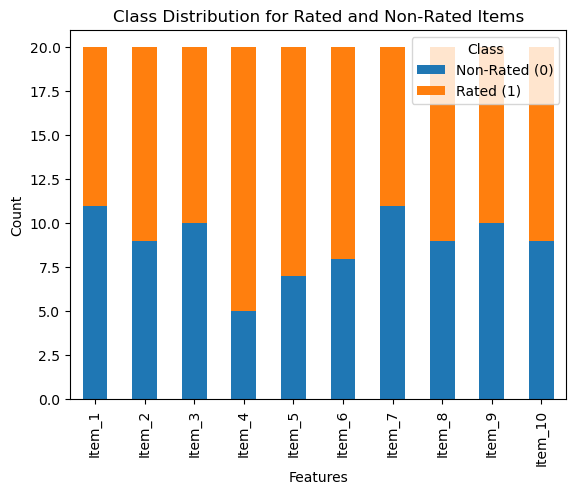

In [463]:
ax = class_distribution.T.plot(kind='bar', stacked=True)
ax.set_xlabel('Features')
ax.set_ylabel('Count')
ax.set_title('Class Distribution for Rated and Non-Rated Items')
plt.legend(title='Class', labels=['Non-Rated (0)', 'Rated (1)'])
plt.show()

# Analytic computations: towards collaborative filtering

The cosine similarity between two vectots $\mathbf{v}_1$ and $\mathbf{v}_2$ is given by the formula

$$
cos(v1,v2) = \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \|\mathbf{v}_2\|}
$$

Where the dot product is given by

$$
\mathbf{v}_1 \cdot \mathbf{v}_2 = \sum_{i=1}^{n} v_{1i} v_{2i}
$$

and the L2 norm 

$$
\| \mathbf{v} \| = \sqrt{\sum_{i=1}^{n} v_i^2}
$$

1. Write a Python function that computes the cosine similarity between two vectors from scratch.
2. Explore the cosine similarity between various pairs of users, and analyse the answers
3. Explore the use of `scipy.spatial.distance.pdist` to get a similarity matrix of all pairs of users in the implicit matrix first, then on the explicit ratings. Analyse and discuss your results

In [464]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.dot(v1, v1)) * np.sqrt(np.dot(v2, v2)))

results = []

for i in range(0, 20):
    for j in range(0, 20): # range(i+1, 20) -> only upper triangle 20*19/12 == 190
        #df_results = df_results.append({'user1': df.values[i,0:1], 'user2': df.values[j,0:1], 'similarity': cosine_similarity(df.values[i,1:], df.values[j,1:])}, ignore_index=True)
        similarity = cosine_similarity(df.values[i,1:], df.values[j,1:])
        results.append((df.values[i,0], df.values[j,0], similarity))
        print(f'{df.values[i,0]} {df.values[j,0]} -> {similarity}')

User_1 User_1 -> 0.9999999999999998
User_1 User_2 -> 0.5999999999999999
User_1 User_3 -> 0.9999999999999998
User_1 User_4 -> 0.8944271909999159
User_1 User_5 -> 0.7302967433402214
User_1 User_6 -> 0.3999999999999999
User_1 User_7 -> 0.6761234037828131
User_1 User_8 -> 0.33806170189140655
User_1 User_9 -> 0.4743416490252569
User_1 User_10 -> 0.3651483716701107
User_1 User_11 -> 0.22360679774997896
User_1 User_12 -> 0.3999999999999999
User_1 User_13 -> 0.4472135954999579
User_1 User_14 -> 0.22360679774997896
User_1 User_15 -> 0.4472135954999579
User_1 User_16 -> 0.5070925528371099
User_1 User_17 -> 0.5070925528371099
User_1 User_18 -> 0.3999999999999999
User_1 User_19 -> 0.5477225575051661
User_1 User_20 -> 0.5070925528371099
User_2 User_1 -> 0.5999999999999999
User_2 User_2 -> 0.9999999999999998
User_2 User_3 -> 0.5999999999999999
User_2 User_4 -> 0.6708203932499369
User_2 User_5 -> 0.7302967433402214
User_2 User_6 -> 0.19999999999999996
User_2 User_7 -> 0.33806170189140655
User_2 User_

In [465]:
df_results = pd.DataFrame(results, columns=['user_1', 'user_2', 'similarity'])
df_results.head()

,user_1,user_2,similarity
0,User_1,User_1,1.000000
1,User_1,User_2,0.600000
2,User_1,User_3,1.000000
3,User_1,User_4,0.894427
4,User_1,User_5,0.730297


In [466]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_1      400 non-null    object 
 1   user_2      400 non-null    object 
 2   similarity  400 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.5+ KB


### Top most similar users
- The pairs (``User_11``, ``User_14``) and (``User_1``, ``User_3``) are the most similar users with a similarity of ``1``.


In [467]:
# ignore df_results where user_1 == user_2
df_results = df_results[df_results['user_1'] != df_results['user_2']]
df_results.sort_values(by='similarity', ascending=False).head(10)

,user_1,user_2,similarity
270,User_14,User_11,1.000000
213,User_11,User_14,1.000000
2,User_1,User_3,1.000000
40,User_3,User_1,1.000000
62,User_4,User_3,0.894427
205,User_11,User_6,0.894427
60,User_4,User_1,0.894427
110,User_6,User_11,0.894427
43,User_3,User_4,0.894427
265,User_14,User_6,0.894427


### Least Similar Users
- The pairs (``User_4``, ``User_8``) and (``User_13``, ``User_20``) are the least similar users with a similarity of ``0.188982``.


In [468]:
df_results.sort_values(by='similarity', ascending=True).head(10)

,user_1,user_2,similarity
392,User_20,User_13,0.188982
67,User_4,User_8,0.188982
143,User_8,User_4,0.188982
259,User_13,User_20,0.188982
31,User_2,User_12,0.200000
25,User_2,User_6,0.200000
101,User_6,User_2,0.200000
221,User_12,User_2,0.200000
93,User_5,User_14,0.204124
278,User_14,User_19,0.204124


In [469]:
df_results_pivot = df_results.pivot(index='user_1', columns='user_2', values='similarity')
sorted(df_results_pivot.columns, key=lambda x: int(x[5:]))[:5]

['User_1', 'User_2', 'User_3', 'User_4', 'User_5']

In [470]:
fig = px.imshow(df_results_pivot)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':sorted(df_results_pivot.columns, key=lambda x: int(x[5:]))})
fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray':sorted(df_results_pivot.columns, key=lambda x: int(x[5:]))})
fig.show()

## Using ``scipy.spatial.distance.pdist``

In [471]:
from scipy.spatial.distance import pdist, squareform

pdist(df.values[0:2,1:], metric='cosine')

# similarity matrix of all pairs
similarity_matrix = pdist(df.values[:,1:], metric='cosine')
similarity_matrix

array([4.00000000e-01, 2.22044605e-16, 1.05572809e-01, 2.69703257e-01,
       6.00000000e-01, 3.23876596e-01, 6.61938298e-01, 5.25658351e-01,
       6.34851628e-01, 7.76393202e-01, 6.00000000e-01, 5.52786405e-01,
       7.76393202e-01, 5.52786405e-01, 4.92907447e-01, 4.92907447e-01,
       6.00000000e-01, 4.52277442e-01, 4.92907447e-01, 4.00000000e-01,
       3.29179607e-01, 2.69703257e-01, 8.00000000e-01, 6.61938298e-01,
       6.61938298e-01, 3.67544468e-01, 4.52277442e-01, 7.76393202e-01,
       8.00000000e-01, 7.76393202e-01, 7.76393202e-01, 7.76393202e-01,
       4.92907447e-01, 3.23876596e-01, 6.00000000e-01, 4.52277442e-01,
       3.23876596e-01, 1.05572809e-01, 2.69703257e-01, 6.00000000e-01,
       3.23876596e-01, 6.61938298e-01, 5.25658351e-01, 6.34851628e-01,
       7.76393202e-01, 6.00000000e-01, 5.52786405e-01, 7.76393202e-01,
       5.52786405e-01, 4.92907447e-01, 4.92907447e-01, 6.00000000e-01,
       4.52277442e-01, 4.92907447e-01, 3.87627564e-01, 7.76393202e-01,
      

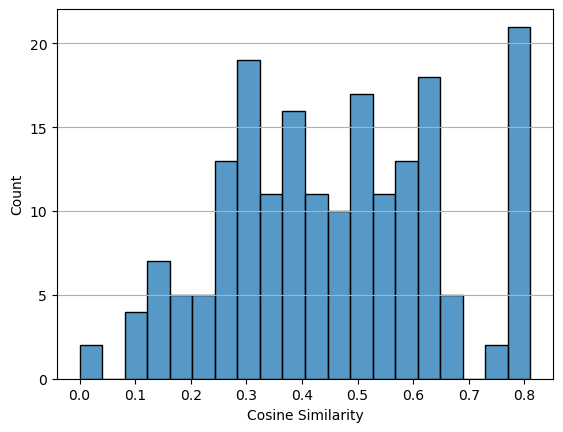

In [472]:
sns.histplot(similarity_matrix, bins=20)
plt.xlabel('Cosine Similarity')
plt.yticks(range(0, 25, 5))
plt.grid(axis='y')
plt.show()

<Axes: >

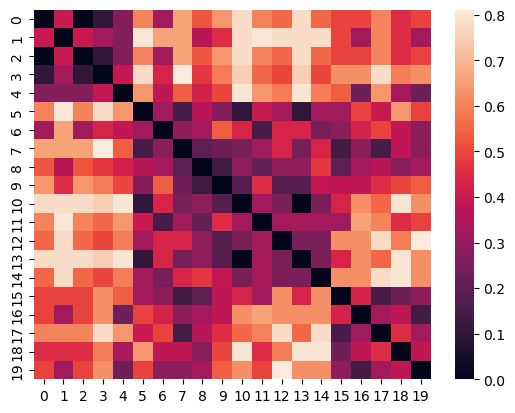

In [473]:
# heatmap of similarity matrix
sns.heatmap(squareform(similarity_matrix))